In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline
import matplotlib.pyplot as plt



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("MTBLS92.csv")

In [4]:
df

,Id,sampleID,class,menopause,bMI,eR,grade,Her2,Nstage,Tstage,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
0,1,A_1,0.0,2,35.0,1,2.0,0,0,3,...,9.963454,3.976321,6.033208,20.737836,39.518648,4.372182,15.099900,15.520762,29.760339,2.890181
1,2,A_2,0.0,2,23.0,0,2.0,0,1,2,...,12.106535,5.006672,7.112918,17.030243,14.513175,2.961922,16.137018,13.461109,11.717635,1.213627
2,3,A_3,0.0,2,28.0,1,2.0,0,2,5,...,12.406024,5.279220,3.238246,23.586563,13.248736,4.775705,16.418746,18.986196,25.661178,1.724701
3,4,A_4,0.0,2,33.0,1,1.0,0,1,2,...,6.644769,4.359540,2.003790,14.733730,6.092037,2.101370,10.146233,8.364284,13.960879,0.816202
4,5,A_5,0.0,2,33.0,1,2.0,0,1,2,...,6.066591,4.565057,3.456530,15.371234,6.091531,1.318297,7.047676,6.197168,6.994256,0.754510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,443,B_3522,NaN,1,23.0,1,3.0,0,0,2,...,4.947312,7.861192,7.422352,35.108122,14.050911,1.960551,9.691469,41.442358,18.335443,1.387309
443,444,B_3527,NaN,2,27.0,1,2.0,0,1,4,...,5.204554,3.667036,5.511829,23.890982,8.236483,1.291081,7.732709,24.248787,11.408903,1.124086
444,445,B_3556,NaN,2,21.0,1,2.0,0,1,4,...,6.202146,3.237032,5.888704,17.596822,10.754855,1.146095,4.250032,11.117008,5.760919,0.737627
445,446,B_3592,NaN,2,25.0,1,3.0,0,0,2,...,4.200426,4.687098,1.180826,28.476610,14.516303,5.826483,6.001031,24.548049,24.579317,0.969572


In [5]:
#checking dimensions of df
df.shape

(447, 151)

In [6]:
#drop_col_df = df.copy()
#for col in drop_col_df.columns:
    #missing = drop_col_df[col].isna().sum()
    #if missing > 0.2 * len(drop_col_df):
       # drop_col_df.drop(labels=[col], axis=1, inplace=True)


In [7]:
#drop_row_df = df.copy() 
#sum_missing = drop_row_df.isnull().sum(axis=1).tolist()
#for row in range(len(sum_missing)):
    #if sum_missing[row] > 0.2 * len(drop_row_df.columns):
           #drop_row_df.drop(labels=[row], axis=0, inplace=True)

In [8]:
df.drop(["sampleID","chemoResponse","eR","grade","Her2","timepoint","series"], axis = 1, inplace = True)

In [9]:
df.dropna(inplace= True)

In [10]:
df.describe()

,Id,class,menopause,bMI,Nstage,Tstage,M1,M2,M3,M4,...,M129,M130,M131,M132,M133,M134,M135,M136,M137,M138
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,...,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,126.621514,0.438247,1.418327,26.023904,0.613546,2.354582,0.811999,51.407375,1.886840,1.021572,...,8.330903,6.036612,4.347183,20.747087,9.650998,2.715565,12.076866,13.142797,14.645712,1.517183
std,73.253233,0.497163,0.494270,4.451452,0.667874,0.856603,0.176932,6.650538,0.847356,0.481338,...,4.573983,3.427378,6.018416,15.540648,7.176535,2.340435,7.740332,9.109974,13.657198,0.908992
min,1.000000,0.000000,1.000000,18.000000,0.000000,1.000000,0.466994,31.651906,0.439193,0.246877,...,1.466853,1.607654,0.611896,2.941342,1.276239,0.201810,2.044233,2.581575,1.440443,0.262536
25%,63.500000,0.000000,1.000000,23.000000,0.000000,2.000000,0.698839,47.879328,1.277181,0.735385,...,5.121719,4.043890,1.617228,10.279039,4.463109,1.310326,6.768763,7.129056,6.054550,0.907547
50%,126.000000,0.000000,1.000000,25.000000,1.000000,2.000000,0.794396,51.902651,1.733653,0.921107,...,7.429607,5.229382,2.657838,16.005913,7.876801,2.143298,10.204713,10.809031,10.588589,1.307204
75%,189.500000,1.000000,2.000000,29.000000,1.000000,2.000000,0.900311,55.626338,2.307975,1.221304,...,10.423276,6.875695,4.524312,26.056818,12.105716,3.267266,14.958573,15.430200,18.131448,1.907625
max,253.000000,1.000000,2.000000,40.000000,3.000000,5.000000,1.661150,67.652271,6.041030,4.880880,...,27.263676,24.431230,42.936089,112.969020,47.888619,19.737080,42.839125,61.256776,98.264030,6.686945


In [11]:
df.shape

(251, 144)

Text(0, 0.5, 'Number of people')

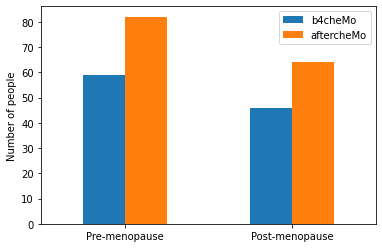

In [12]:
menopause_chemo = len(df[df["menopause"] == 2][df["class"] == 0])
menopause_nochemo = len(df[df["menopause"] == 2][df["class"] == 1])

nomenopause_chemo = len(df[df["menopause"] == 1][df["class"] == 0])
nomenopause_nochemo = len(df[df["menopause"] == 1][df["class"] == 1])

groups = [
    [menopause_chemo, menopause_nochemo], 
    [nomenopause_chemo, nomenopause_nochemo]
]

group_labels = ['b4cheMo', 'aftercheMo']
xticks = ['Pre-menopause', 'Post-menopause']

# Convert data to pandas DataFrame.
df_new = pd.DataFrame(groups, index=group_labels).T

# Plot.
ax = df_new.plot.bar()
ax.set_xticklabels(xticks, rotation=0)
ax.set_ylabel('Number of people')

(<Figure size 432x288 with 3 Axes>,
 {('2', '0.0'): (0.0, 0.0, 0.4162454658976037, 0.5600379686758424),
  ('2', '1.0'): (0.0,
   0.563360227812055,
   0.4162454658976037,
   0.4366397721879449),
  ('1', '0.0'): (0.4212205902757131,
   0.0,
   0.5787794097242869,
   0.5597779092522641),
  ('1', '1.0'): (0.4212205902757131,
   0.5631001683884768,
   0.5787794097242869,
   0.4368998316115232)})

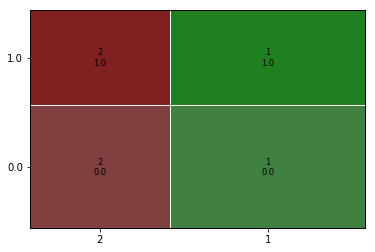

In [13]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['menopause', 'class'])

In [22]:
myField1 = df['menopause']
myField2 = df['class']

In [23]:
fieLd = pd.DataFrame({"men": myField1, "clasS": myField2})

In [24]:
myCrosstable = pd.crosstab(myField1, myField2, margins=True)
myCrosstable.columns =  ['b4cheMo', 'aftercheMo','row_totals']
myCrosstable.index = ['men1', 'men2','col_totals']
observed = myCrosstable.iloc[0:2,0:2]
myCrosstable

,b4cheMo,aftercheMo,row_totals
men1,82,64,146
men2,59,46,105
col_totals,141,110,251


In [27]:
expected = np.outer(myCrosstable['row_totals'][0:2],
                   myCrosstable.loc['col_totals'][0:2])/251
expected = pd.DataFrame(expected)

expected.cols = ['b4cheMo', 'aftercheMo']
expected.ind = ['men1', 'men2']
expected

,0,1
0,82.015936,63.984064
1,58.984064,46.015936


In [28]:
from scipy.stats import chi2_contingency

In [29]:
table = np.array([[82,64],
                 [59,46]])
chi2,p,dof,expected=chi2_contingency(table)
print(f"chi2 statistic:   {chi2:.5g}")
print(f"p_value:   {p:.5g}")
print(f"degrees of freedom:   {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:   0.015584
p_value:   0.90065
degrees of freedom:   1
expected frequencies:
[[82.01593625 63.98406375]
 [58.98406375 46.01593625]]


In [38]:
data= pd.read_csv("MenMetall.csv")
data

,Label,met_labels,Pvalues
0,LysoPE(18:1),M13,0.0495974
1,PC(32:5),M20,0.00920953
2,PC(34:3e)|PE(37:3e),M27,0.00014564
3,PC(36:1),M31,0.023229
4,PC(36:4),M35,0.0172351
...,...,...,...
133,LysoPC(16:1),M5,0.916692
134,LysoPC(16:0e),M4,0.434458
135,LysoPC(14:0),M3,0.500099
136,Cer(d18:1/22:6),M2,0.325719


In [39]:
def p_adjust_bh(p):
    """Benjamini-Hochberg p-value correction for multiple hypothesis testing."""
    p = np.asfarray(data['Pvalues'])
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

In [40]:
a = p_adjust_bh(p)
a

ValueError: could not convert string to float: '8.34159*10^-7'